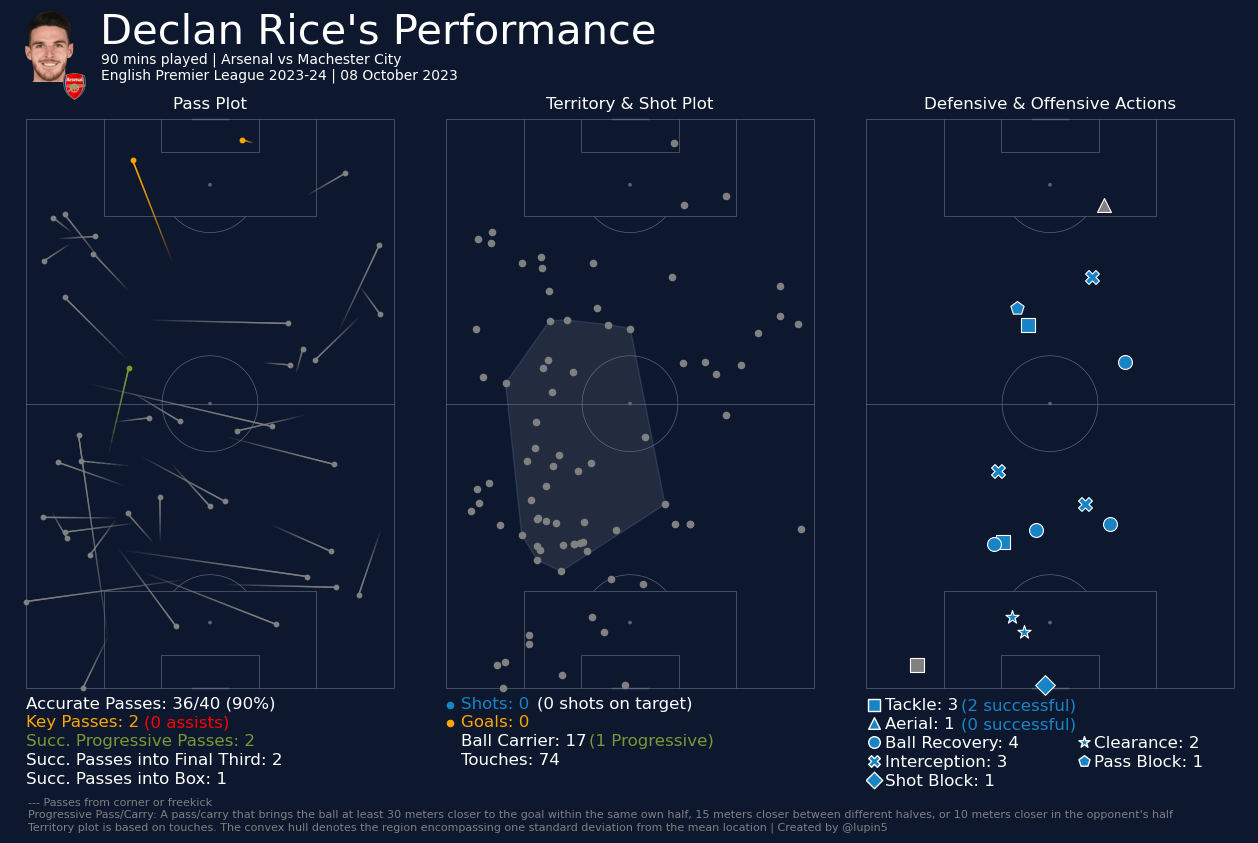

In [1]:
# %% Create outfield performance from a football match
#
# Inputs:   Events_df, players_df data frames
#           
# Outputs:  Player performance

# %% Imports and parameters
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from PIL import Image
import urllib
import warnings

# Import viztools module for plots and data preparation
import sys
sys.path.append("/Football Analysis")  
import Analysis_Tools.viztools as vt
import Analysis_Tools.getWhoscored as gws
# Ignore warnings
warnings.filterwarnings("ignore")

# Load data
events_df = pd.read_csv("Data/1729305.csv")
players_df = pd.read_csv("Data/players_df_1729305.csv")

# Plot match performance for Declan Rice
playerId = 332325
hteam = "Arsenal"
ateam = "Machester City"
league = "English Premier League"
season = '2023-24'
match_date = '08 October 2023'

# Set color for visualization
h_color = '#1984c5'
a_color = '#c23728'
cred = '#FF3333'
cblue = '#0092CC'
cyellow = '#DCD427'
cgreen = '#779933'
legend_fontsize = 12

# Get player metrics
pass_df =gws.get_pass_df(events_df)
player_name = players_df.query('playerId == @playerId').iloc[0][2]
mins_played = players_df.query('playerId == @playerId').iloc[0].mins_played
player_shots = players_df.query('playerId == @playerId').iloc[0].shotsTotal
player_sot = players_df.query('playerId == @playerId').iloc[0].shotsOnTarget
player_pass = players_df.query('playerId == @playerId').iloc[0].passesTotal
player_passAcc = players_df.query('playerId == @playerId').iloc[0].passesAccurate
player_passSucc = round(100*player_passAcc/player_pass,0)
player_keypass = players_df.query('playerId == @playerId').iloc[0].passesKey
pass_filter = (pass_df['playerId']==playerId)
player_df = pass_df[pass_filter][['eventType', 'outcomeType', 'key_pass', 'thirdpass', 'isAssist', 'progressive_pass','ppa']]
player_assist = len(player_df.query('isAssist==True'))
player_prp = len(player_df.query('progressive_pass==True'))
player_succ_prp = len(player_df.query('progressive_pass==True and outcomeType =="Successful"'))
player_3p = len(player_df.query('thirdpass ==True and outcomeType =="Successful"'))
player_ppa = len(player_df.query('ppa ==True and outcomeType == "Successful"'))

carrier = events_df.query('eventType == "Carry"')
carrie_filter = (carrier['playerId']==playerId)
c_df = carrier[carrie_filter]
player_carrier = len(c_df)
player_prg_carrier = len(c_df.query('progressive_pass ==True'))
player_goal = len(events_df.query('playerId ==@playerId and isGoal == True'))
player_touches = len(events_df.query('playerId ==@playerId and isTouch == True'))

# Create plot
fig = plt.figure(figsize=(16, 9), constrained_layout=False)
fig.set_facecolor("#0D182E")
gs = fig.add_gridspec(nrows=2, ncols=3, wspace=0.05, height_ratios=[0.15, 1],hspace=0.015)

# Create grid for player infomation
ax0=fig.add_subplot(gs[0,0:2])
ax0.set_facecolor("#0D182E")
ax0.axis("off")
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)

# Create grid for Pass plot
ax1= fig.add_subplot(gs[1,0])
ax1.set_facecolor("#0D182E")

# Create grid for Territory plot
ax2= fig.add_subplot(gs[1,1])
ax2.set_facecolor("#0D182E")

# Create grid for Defensive actions plot
ax3= fig.add_subplot(gs[1,2])
ax3.set_facecolor("#0D182E")


# Plot Pass plot on ax1
vt.pass_plot(pass_df, playerId=playerId, ax=ax1)

# Plot Territory plot on ax2
vt.convex_hull(events_df, playerId=playerId, ax=ax2)

# Plot Defensive actions plot on ax3
vt.defending_plot(events_df, playerId=playerId, ax=ax3)

# Add title and player information
title_text = f"{player_name}'s Performance"
ax0.text(0.11, 0.75, f"{player_name}'s Performance", 
         horizontalalignment='left',
         verticalalignment='center',
         color='white',
         fontsize=30
        )
ax0.text(0.111, 0.45, f"{mins_played:.0f} mins played | {hteam} vs {ateam}", 
         horizontalalignment='left',
         verticalalignment='center',
         color='white',
         fontsize=10
        )
ax0.text(0.111, 0.27, f"{league} {season} | {match_date}", 
         horizontalalignment='left',
         verticalalignment='center',
         color='white',
         fontsize=10
        )

# Add player photo 
fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
player_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{654096:.0f}.png"))
ax0 = fig.add_axes([0.11, 0.8, 0.08, 0.08])
ax0.imshow(player_icon)
ax0.axis("off")

# Add legends and notes for Pass plot
legend_ax = fig.add_axes([0.135, 0.01, 0.2, 0.14])
legend_ax.axis("off")
plt.xlim([0, 5])
plt.ylim([0, 1])
set_x = 0.12
set_y = 0.7
text_x = 0.0
text_y = 0.67 

legend_ax.text(text_x, text_y, f"Accurate Passes: {player_passAcc:.0f}/{player_pass:.0f} ({player_passSucc:.0f}%)", color='white', fontsize=legend_fontsize)
legend_ax.text(text_x, text_y-0.15, f"Key Passes: {player_keypass:.0f}",color="orange", fontsize=legend_fontsize)
legend_ax.text(text_x+1.85+0.05*(player_keypass//5), text_y-0.15,f"({player_assist} assists)", color='red', fontsize=legend_fontsize)
legend_ax.text(text_x, text_y-0.3, f"Succ. Progressive Passes: {player_succ_prp}", color="#779933", fontsize=legend_fontsize)
legend_ax.text(text_x, text_y-0.45, f"Succ. Passes into Final Third: {player_3p}",color="white", fontsize=legend_fontsize)
legend_ax.text(text_x, text_y-0.60, f"Succ. Passes into Box: {player_ppa}",color="white", fontsize=legend_fontsize)

# Add legends and notes for Territory plot
legend_ax = fig.add_axes([0.395, 0.01, 0.2, 0.14])
legend_ax.axis("off")
plt.xlim([0, 5])
plt.ylim([0, 1])
set_x = 0.12
set_y = 0.7
text_x = 0.29    
text_y = 0.67 
legend_ax.scatter(set_x, set_y, marker='o', s=20, c=h_color)
legend_ax.text(text_x, text_y, f"Shots: {player_shots:.0f}", color=h_color, fontsize=legend_fontsize)
legend_ax.text(text_x+1.2, text_y, f"({player_sot:.0f} shots on target)", color='white', fontsize=legend_fontsize)
legend_ax.scatter(set_x, set_y-0.15, marker='o', s=20, c='orange')
legend_ax.text(text_x, text_y-0.15,f"Goals: {player_goal}", color='orange', fontsize=legend_fontsize)
legend_ax.text(text_x, text_y-0.3,f"Ball Carrier: {player_carrier}", color='white', fontsize=legend_fontsize)
legend_ax.text(text_x+2, text_y-0.3,f"({player_prg_carrier} Progressive)", color=cgreen, fontsize=legend_fontsize)
legend_ax.text(text_x, text_y-0.45,f"Touches: {player_touches:.0f}", color='white', fontsize=legend_fontsize)


# Add legends and notes for Defensive plot
legends ={'Tackle':'s', 'Aerial':'^', 'BallRecovery':'o', 'Clearance':'*', 'Interception':'X', 'BlockedPass': 'p',
         'Save': 'D'}
legend_ax = fig.add_axes([0.66, 0.01, 0.2, 0.14])
legend_ax.axis("off")
plt.xlim([0, 5])
plt.ylim([0, 1])
set_xd = 0.12
set_yd = 0.7
text_xd = 0.29    
text_yd = 0.656 
limit = 0
for legend in legends:
    if legend =='Save':
        legendtext = "Shot Block"
    elif legend == 'BallRecovery':
        legendtext = "Ball Recovery"
    elif legend == 'BlockedPass':
        legendtext = "Pass Block"
    else:
        legendtext = legend

    try:
        value = gws.defend_metrics(events_df, playerId=playerId).loc[legend]['total']
        status ='yes'
    except:
        status = 'no'
        
    if status == 'yes':
        s_value = gws.defend_metrics(events_df, playerId=playerId).loc[legend]['Successful']
        text = f"{legendtext}: {value} ({s_value} successful)"

        if limit==3 or limit ==5:            
            set_xd = 2.9+0.5
            text_xd = 3.07+0.5
            set_yd = 0.7-(limit+1)*0.15/2
            text_yd = 0.656-(limit+1)*0.15/2
            legend_ax.scatter(set_xd, set_yd, marker=legends[legend], s=70, c=h_color, edgecolors='w')
            if legend in ['Tackle', 'Aerial']:
                if value>9:
                    legend_ax.text(text_xd, text_yd, f"{legendtext}: {value}", color="w", fontsize=legend_fontsize)
                    legend_ax.text(text_xd+1.3, text_yd, f"({s_value} successful)", color=h_color, fontsize=legend_fontsize)
                else:
                    legend_ax.text(text_xd, text_yd, f"{legendtext}: {value}", color="w", fontsize=legend_fontsize)
                    legend_ax.text(text_xd+1.2, text_yd, f"({s_value} successful)", color=h_color, fontsize=legend_fontsize)
            else:
                legend_ax.text(text_xd, text_yd, f"{legendtext}: {value}", color='w', fontsize=legend_fontsize)

        else:
            set_xd = 0.12
            text_xd = 0.29    
            legend_ax.scatter(set_xd, set_yd, marker=legends[legend], s=70, c=h_color, edgecolors='w')
            if legend in ['Tackle', 'Aerial']:
                if value>9:
                    legend_ax.text(text_xd, text_yd, f"{legendtext}: {value}", color="w", fontsize=legend_fontsize)
                    legend_ax.text(text_xd+1.3, text_yd, f"({s_value} successful)", color=h_color, fontsize=legend_fontsize)
                else:
                    legend_ax.text(text_xd, text_yd, f"{legendtext}: {value}", color="w", fontsize=legend_fontsize)
                    legend_ax.text(text_xd+1.2, text_yd, f"({s_value} successful)", color=h_color, fontsize=legend_fontsize)
            else:
                legend_ax.text(text_xd, text_yd, f"{legendtext}: {value}", color='w', fontsize=legend_fontsize)
        set_yd -=0.15
        text_yd -=0.15
        limit +=1

# Add additional notes and signature
def_text="Progressive Pass/Carry: A pass/carry that brings the ball at least 30 meters closer to the goal within the same own half, 15 meters closer between different halves, or 10 meters closer in the opponent's half"
convext_text="Territory plot is based on touches. The convex hull denotes the region encompassing one standard deviation from the mean location | Created by @lupin5"
set_piece_text = "--- Passes from corner or freekick"
plt.text(-13.1, -0.2, def_text, color='gray', fontsize=8)
plt.text(-13.1, -0.3, convext_text, color='gray', fontsize=8)
plt.text(-13.1, -0.1, set_piece_text, color='gray', fontsize=8)


# Add club logo
club_fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
club_logo = Image.open(urllib.request.urlopen(f"{club_fotmob_url}{9825:.0f}.png"))
ax0 = fig.add_axes([0.15, 0.78, 0.03, 0.03])
ax0.imshow(club_logo)
ax0.axis("off")

plt.savefig(f'Images\\Player_report_{player_name}.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()